In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from surprise import SVD
from surprise import Reader
from surprise import Dataset
from surprise import evaluate, print_perf
from surprise import accuracy
from sklearn import cross_validation as cv

%matplotlib inline

/Users/jose/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Laboratorio 2 - SR por factorización

En este laboratorio se ajustará un modelo de factorización utilizando el framework Surprise:
https://surprise.readthedocs.io/en/stable/index.html

Los datos fueron previamente separados en conjunto de entrenamiento, validación y test.

## 1. Exploración de los datasets de entrenamiento, validación y prueba

Ejecute las siguientes líneas y concluya sobre cómo están construidos estos datasets

In [2]:
df = pd.read_csv( '/Users/jose/Documents/Maestria/Sistemas de recomendación/Taller 2/toronto/toronto_reviews.csv')

In [3]:
df

,id,stars,user_id,business_id,useful,cool,funny
0,---0hl58W-sjVTKi5LghGw,4,Y6qylbHq8QJmaCRSlKdIog,Ae4ABFarGMaI5lk1i98A0w,0,0,0
1,---OVMmOizYt30bx3-D0gA,5,WH0D3U5UAtNy0X5U5ZeJnw,ixGb4NLfgD90wZHlw94rLw,6,5,1
2,--0pfY3vQilgl20btE0fVQ,4,wbYWgTS-vzgfVYV_C1qhig,5BPv_vAnRp5EKdmacqvrLw,5,3,2
3,--0y7xOZPpiGD5d6vgfafg,1,EUdDBB1fHLq86T0aI9VLtg,vh1tPEaPioD78QmoqnWXpw,1,0,1
4,--1sfdWmiYGbTxpGTy-3ZQ,1,hZgREoZPC30EEilayde2Ug,qAg8GkN9rforFWmGxBqVqA,2,0,0
5,--1Uj2FGirXqBmi_oA6-qg,5,-BJIu6TWs26q2yxozPAbEg,yxdmX8dXk5Se9zJ4WAW1pw,3,0,0
6,--1U_KyCEPuYg2a1q03FbQ,5,0tpJmUYvbQSRbNa6DI0WVA,-yZXurhfOYlNKmH0ZyNGIQ,0,0,0
7,--242HMKec9b90td9y_s5g,5,3fR4DeE_eSa7SbzuC_fsaQ,i1Xkm22_96GNVVOXSUoL0A,0,0,0
8,--2WluEwS6KHmD-2v2V5sw,5,FykmLnIuh6oPaSPJ3RLB_A,aLcFhMe6DDJ430zelCpd2A,0,0,1
9,--3sDRa8FTI_cKLF4eUAeQ,2,dhPp4t9_fD0R0eNsp_gYZw,d6G0w_e3GaA90NSQeovShA,0,0,0


In [4]:
df2 = df[[ 'user_id', 'business_id', 'stars'] ]

In [5]:
df2.dtypes

user_id        object
business_id    object
stars           int64
dtype: object

In [6]:
train_df, test_df = cv.train_test_split(df2, test_size=0.4)

 train_df = pd.read_csv( './data/train', sep = '::', names = [ 'user_id', 'item_id', 'rating', 'timestamp' ], engine = 'python' )
validation_df = pd.read_csv( './data/cv', sep = '::', names = [ 'user_id', 'item_id', 'rating', 'timestamp'], engine = 'python' )
test_df = pd.read_csv( './data/test', sep = '::', names = [ 'user_id', 'item_id', 'rating', 'timestamp' ], engine = 'python' )

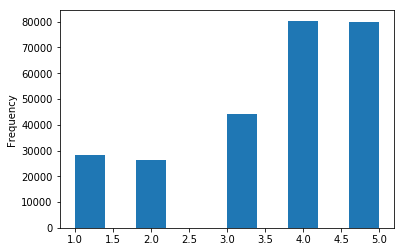

In [7]:
train_df.stars.plot.hist()

In [8]:
train_df.describe()

,stars
count,258628.000000
mean,3.608492
std,1.307591
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


validation_df.rating.plot.hist()

validation_df.describe()

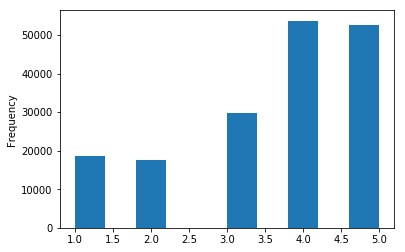

In [9]:
test_df.stars.plot.hist()

In [10]:
test_df.describe()

,stars
count,172419.000000
mean,3.604139
std,1.306059
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


In [11]:
print( 'Train size: ' + str( train_df.shape ) )
#print('Validation size: ' + str( validation_df.shape ) )
print( 'Test size: ' + str( test_df.shape ) )

Train size: (258628, 3)
Test size: (172419, 3)


## 2. Transformación de los dataset al formato de Surprise

El framework lee los dataframes de pandas y los transforma a un formato que es aceptado por él

In [12]:
# Se establece el rango en el cual se aceptaran los ratings
reader = Reader( rating_scale = ( 1, 5 ) )

In [13]:
# Transformación de los datasets, puede leer los datasets directameente desde el disco sin necesidad de pasar por pandas
train_data = Dataset.load_from_df( train_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )
#validation_data = Dataset.load_from_df( validation_df[ [ 'user_id', 'item_id', 'rating' ] ], reader )
test_data = Dataset.load_from_df( test_df[ [ 'user_id', 'business_id', 'stars' ] ], reader )

In [14]:
train_data

In [15]:
# Surprise requiere que explicitamente los datasets sean transformados a datasets de entrenamiento y prueba en cada caso 
# Si bien no se entrenará sobre los datasets de validación y prueba, surprise requiere que sean tranformados a entrenamiento para posteriormente ser transformados a prueba
train_data = train_data.build_full_trainset()
#validation_data = validation_data.build_full_trainset()
test_data = test_data.build_full_trainset()

In [16]:
# Finalmente, se convierten los 3 datasets a prueba ya que se medirá el error obtenido en los 3
train_data_2 = train_data.build_testset()
#validation_data = validation_data.build_testset()
test_data = test_data.build_testset()

## 3. Entrenamiento de un modelo SVD con bias

El modelo toma como base el promedio global. En este caso es de 3.5162

In [17]:
mean = train_data.global_mean
print( mean )

3.6084917333


In [18]:
train_data

La clase SVD recibe los siguientes parámetros:
https://surprise.readthedocs.io/en/stable/matrix_factorization.html#surprise.prediction_algorithms.matrix_factorization.SVD
* n_factors: Número k de factores para realizar la recomendación
* n_epochs: Número de iteraciones a realizar sobre los datos
* biased: Si el modelo contempla los bias o solo la factorización
* lr_all: Tasa de aprendizaje del método
* reg_all: Parámetro de regularización
* init_mean y init_std_dev son los parámetros de la distribución usada para inicializar aleatoriamente los factores

Se prueba un modelo con bias sin regularización para k=5




In [19]:
algo = SVD( n_factors = 5, n_epochs = 200, biased = True, lr_all = 0.005, reg_all = 0, init_mean = 0, init_std_dev = 0.01, verbose = True )

In [20]:
# Se realiza el entrenamiento a partir del dataset debido
algo.train( train_data )

/Users/jose/anaconda3/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Al finalizar el entrenamiento, se visualiza cómo quedo la matriz que representa a los usuarios ($p_u$) y la matriz que representa a los items ($q_i$)

In [21]:
pu = algo.pu

In [22]:
pu

array([[-0.30678429,  0.23210799, -1.15433495,  0.15181753,  0.35002885],
       [-0.273541  , -0.81507756, -0.41545259, -0.95643294,  0.06036607],
       [-0.0614303 , -0.08628692,  0.16870712,  0.0797325 , -0.08950031],
       ..., 
       [-0.03842898, -0.01407048,  0.23613281, -0.27610098,  0.06919786],
       [-0.01282063,  0.04115804, -0.00115637, -0.0180978 , -0.03292212],
       [-0.03817918, -0.04049894,  0.26023163, -0.03264937,  0.20304922]])

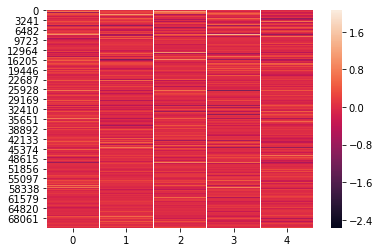

In [23]:
sns.heatmap( pu )

In [24]:
qi = algo.qi

In [25]:
qi

array([[ -3.64566435e-01,   1.60612611e+00,   3.41559436e-01,
          1.75379685e+00,   4.89581431e-01],
       [ -2.38590141e-01,  -5.06434005e-01,  -5.22446808e-01,
         -1.82025959e+00,  -1.90495399e+00],
       [ -1.58575505e-02,   6.07669812e-01,  -1.42936975e+00,
         -5.32913911e-01,   6.83488292e-01],
       ..., 
       [ -2.10656012e-02,   1.57543196e-02,  -9.79307740e-03,
         -1.01105479e-02,  -1.42881300e-03],
       [ -1.82291304e-02,  -3.44386808e-03,  -1.60859196e-02,
         -5.60100082e-03,  -8.05388469e-03],
       [ -1.26666424e-02,   3.10820083e-02,  -3.13431123e-02,
          4.12213728e-02,  -3.58574273e-02]])

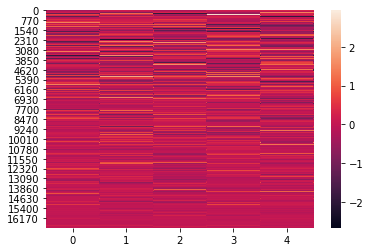

In [26]:
sns.heatmap( qi )

También se pueden visualizar los bias de usuarios e items $b_u$ y $b_i$

In [27]:
bi = algo.bi.reshape( algo.bi.shape[ 0 ], 1 )
bu = algo.bu.reshape( algo.bu.shape[ 0 ], 1 )

In [28]:
bu

array([[-0.22823323],
       [-0.5953964 ],
       [-0.5129138 ],
       ..., 
       [-0.53342609],
       [ 0.07476173],
       [ 1.54469385]])

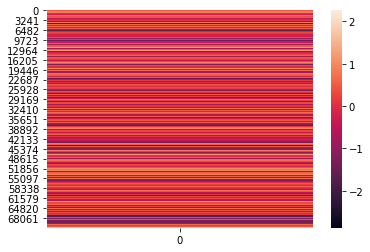

In [29]:
sns.heatmap( bu )

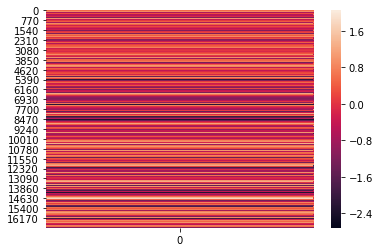

In [30]:
sns.heatmap( bi )

### Reconstrucción de la matriz original

Una vez se realiza la factorización, se puede reconstruir la predicción para cada una de las coordenadas de la matriz original

$\hat{r}_{ui}= \mu + b_{i} + b_{u} + p_{u}\dot q_{i}^{T} $

In [ ]:
reconstruct = ( pu ).dot( ( qi ).T ) + bu + bi.T + mean

In [ ]:
sns.heatmap( reconstruct )

In [ ]:
# Ya que algunos ratings reconstruidos están fuera del rango aceptado, se realiza un ajuste entre 1 y 5
reconstruct = np.clip( reconstruct, 1, 5 )
sns.heatmap( reconstruct )

Compare los resultados con la matriz original:

In [ ]:
original = np.zeros( ( train_data.n_users , train_data.n_items ) )
for ( u, i, r ) in train_data.all_ratings():
    original[ u ][ i ] = r

In [ ]:
sns.heatmap( original )

### Se compara visualmente el error en las entradas conocidas de la matriz ( error en conjunto de entrenamiento )

In [31]:
known_entries = original == 0

NameError: name 'original' is not defined

In [ ]:
reconstruct[ known_entries ] = 0

In [ ]:
sns.heatmap( np.abs( original - reconstruct ) )

In [ ]:
np.abs( original - reconstruct )

## 3. Evaluación de predicciones

A partir del modelo entrenado, se mide el error del modelo en el conjunto de entrenamiento, validación y prueba

In [32]:
predictions_train = algo.test( train_data_2 )

In [33]:
#predictions_validation = algo.test( validation_data )
predictions_test = algo.test( test_data )

In [34]:
accuracy.rmse( predictions_train, verbose = True )

RMSE: 0.4905


0.4904834020903614

accuracy.rmse( predictions_validation, verbose = True )

In [35]:
accuracy.rmse( predictions_test, verbose = True )

RMSE: 1.3157


1.3157138435428022

## 4. Selección de hiper-parámetros

Utilice este notebook para realizar los siguientes ajustes:

4.1 Aumente el número k de dimensiones del vector y documente los resultados. Evidencie el efecto que tiene esta variación en los parámetros obtenidos y en los errores (cree una gráfica donde muestre el efecto que tiene k sobre los errores)

4.2 Para un k fijo, aumente la regularización para diferentes valores [0.001,0.1,0.5,1,10]. Evidencie el efecto que tiene esta variación en los parámetros obtenidos y en los errores

In [36]:
algos = {}
for i in range(5, 21):
    algos[i] = SVD( n_factors = i, n_epochs = 200, biased = True, lr_all = 0.005, reg_all = 0, init_mean = 0, init_std_dev = 0.01, verbose = True )
    algos[i].train(train_data)


/Users/jose/anaconda3/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processin

Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processi

Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processing epoch 52
Process

Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processing epoch 52
Processing epoch 53
Proces

Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processing epoch 52
Processing epoch 53
Processing epoch 54
Proce

Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processing epoch 52
Processing epoch 53
Processing epoch 54
Processing epoch 55
Proc

Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processing epoch 52
Processing epoch 53
Processing epoch 54
Processing epoch 55
Processing epoch 56
Pro

In [37]:
predictions_train = {}
#predictions_validation = {}
predictions_test = {}
rmses_train = {}
#rmses_validation = {}
rmses_test = {}
for i in range(5, 21):
    predictions_train[i] = algos[i].test(train_data_2)
    #predictions_validation[i] = algos[i].test(validation_data)
    predictions_test[i] = algos[i].test(test_data)
    rmses_train[i] = accuracy.rmse( predictions_train[i], verbose = True )
    #rmses_validation[i] = accuracy.rmse( predictions_validation[i], verbose = True )
    rmses_test[i] = accuracy.rmse( predictions_test[i], verbose = True )

RMSE: 0.4908
RMSE: 1.3160
RMSE: 0.4481
RMSE: 1.3224
RMSE: 0.4141
RMSE: 1.3255
RMSE: 0.3851
RMSE: 1.3243
RMSE: 0.3562
RMSE: 1.3262
RMSE: 0.3336
RMSE: 1.3253
RMSE: 0.3147
RMSE: 1.3236
RMSE: 0.2968
RMSE: 1.3229
RMSE: 0.2775
RMSE: 1.3223
RMSE: 0.2640
RMSE: 1.3203
RMSE: 0.2507
RMSE: 1.3188
RMSE: 0.2378
RMSE: 1.3164
RMSE: 0.2283
RMSE: 1.3113
RMSE: 0.2187
RMSE: 1.3080
RMSE: 0.2093
RMSE: 1.3075
RMSE: 0.2020
RMSE: 1.3047


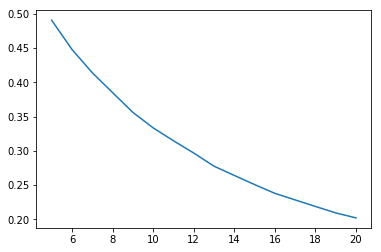

In [38]:
plt.plot(rmses_train.keys(), rmses_train.values())

In [39]:
algosr = {}
for r in [0.001, 0.1, 0.5, 1, 10]:
    algosr[r] = SVD( n_factors = 5, n_epochs = 200, biased = True, lr_all = 0.005, reg_all = r, init_mean = 0, init_std_dev = 0.01, verbose = True )
    algosr[r].train(train_data)


/Users/jose/anaconda3/lib/python3.6/site-packages/surprise/prediction_algorithms/algo_base.py:51: UserWarning: train() is deprecated. Use fit() instead
  warnings.warn('train() is deprecated. Use fit() instead', UserWarning)


Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing

Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processin

Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 10
Processing epoch 11
Processing epoch 12
Processing epoch 13
Processing epoch 14
Processing epoch 15
Processing epoch 16
Processing epoch 17
Processing epoch 18
Processing epoch 19
Processing epoch 20
Processing epoch 21
Processing epoch 22
Processing epoch 23
Processing epoch 24
Processing epoch 25
Processing epoch 26
Processing epoch 27
Processing epoch 28
Processing epoch 29
Processing epoch 30
Processing epoch 31
Processing epoch 32
Processing epoch 33
Processing epoch 34
Processing epoch 35
Processing epoch 36
Processing epoch 37
Processing epoch 38
Processing epoch 39
Processing epoch 40
Processing epoch 41
Processing epoch 42
Processing epoch 43
Processing epoch 44
Processing epoch 45
Processing epoch 46
Processing epoch 47
Processing epoch 48
Processing epoch 49
Processing epoch 50
Processing epoch 51
Processi

In [41]:
predictions_train = {}
#predictions_validation = {}
predictions_test = {}
rmses_train = {}
#rmses_validation = {}
rmses_test = {}
for i in [0.001, 0.1, 0.5, 1, 10]:
    predictions_train[i] = algosr[i].test(train_data_2)
    #predictions_validation[i] = algosr[i].test(validation_data)
    predictions_test[i] = algosr[i].test(test_data)
    rmses_train[i] = accuracy.rmse( predictions_train[i], verbose = True )
    #rmses_validation[i] = accuracy.rmse( predictions_validation[i], verbose = True )
    rmses_test[i] = accuracy.rmse( predictions_test[i], verbose = True )

RMSE: 0.4908
RMSE: 1.3153
RMSE: 0.6636
RMSE: 1.2256
RMSE: 0.9219
RMSE: 1.1974
RMSE: 0.9800
RMSE: 1.2040
RMSE: 1.2278
RMSE: 1.2742


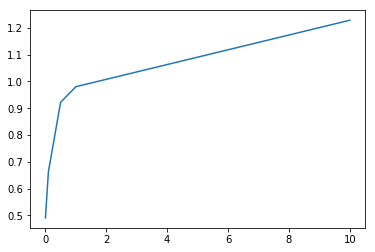

In [42]:
plt.plot(rmses_train.keys(), rmses_train.values())




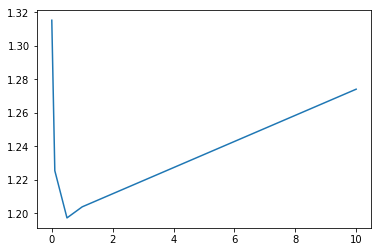

In [43]:
plt.plot(rmses_test.keys(), rmses_test.values())